# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset using google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing dataframe and splitting date in new numerical features of date, month and year
df = pd.read_csv('/content/drive/MyDrive/jobathon_june2022/train_wn75k28.csv')
df[['created_at_Y', 'created_at_m', 'created_at_d']] = df['created_at'].str.split('-', expand = True)
temp1 = df.pop('created_at_d')
temp2 = df.pop('created_at_m')
temp3 = df.pop('created_at_Y')
df.insert(1,'created_at_d',temp1)
df.insert(2,'created_at_m',temp2)
df.insert(3,'created_at_Y',temp3)
df.pop('created_at')

df[['signup_date_Y', 'signup_date_m', 'signup_date_d']] = df['signup_date'].str.split('-', expand = True)
temp1 = df.pop('signup_date_d')
temp2 = df.pop('signup_date_m')
temp3 = df.pop('signup_date_Y')
df.insert(7,'signup_date_d',temp1)
df.insert(8,'signup_date_m',temp2)
df.insert(9,'signup_date_Y',temp3)
df.pop('signup_date')

0        2020-09-24
1        2020-09-19
2        2021-08-11
3        2017-10-04
4        2020-06-08
            ...    
39156    2017-10-19
39157           NaN
39158           NaN
39159           NaN
39160    2019-08-11
Name: signup_date, Length: 39161, dtype: object

In [ ]:
df

,id,created_at_d,created_at_m,created_at_Y,campaign_var_1,campaign_var_2,products_purchased,signup_date_d,signup_date_m,signup_date_Y,...,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,01,01,2021,1,2,2.0,24,09,2020,...,0,0,0,1,1,0,0,0,0,0
1,2,01,01,2021,2,1,2.0,19,09,2020,...,0,0,0,1,0,0,0,0,0,0
2,3,01,01,2021,9,3,3.0,11,08,2021,...,0,0,0,0,0,0,0,0,0,0
3,4,01,01,2021,6,7,2.0,04,10,2017,...,0,0,0,0,0,0,0,0,0,0
4,5,01,01,2021,4,6,NaN,08,06,2020,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,31,12,2021,11,11,2.0,19,10,2017,...,0,1,1,1,0,0,0,0,0,0
39157,39158,31,12,2021,3,9,3.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
39158,39159,31,12,2021,8,7,2.0,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0
39159,39160,31,12,2021,7,12,2.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#Checking percentage of Null values in the data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
products_purchased,20911,0.533975
signup_date_d,15113,0.385920
signup_date_m,15113,0.385920
signup_date_Y,15113,0.385920
id,0,0.000000


In [ ]:
#Checking unique values of features
for col in df.columns:
  print(col, df[col].unique())

id [    1     2     3 ... 39159 39160 39161]
created_at_d ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
created_at_m ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
created_at_Y ['2021']
campaign_var_1 [ 1  2  9  6  4  3  5  7 13  8 12 10 14 11 16 15]
campaign_var_2 [ 2  1  3  7  6  4 10  5  8  9 12 11 13 14 15]
products_purchased [ 2.  3. nan  1.  4.]
signup_date_d ['24' '19' '11' '04' '08' '02' '12' '21' '20' '07' nan '09' '28' '03' '31'
 '22' '06' '14' '18' '16' '10' '26' '01' '25' '17' '05' '15' '30' '23'
 '13' '29' '27']
signup_date_m ['09' '08' '10' '06' '07' '12' '01' nan '05' '03' '02' '04' '11']
signup_date_Y ['2020' '2021' '2017' '2019' '2018' nan '2022' '2016' '2015']
user_activity_var_1 [0 1 2 3]
user_activity_var_2 [0 1]
user_activity_var_3 [0 1]
user_activity_var_4 [0 1]
user_activity_var_5 [0 1 2]
user_activity_var_6 [0 1 2 3]
user_activity_var_7

In [ ]:
#Checking data type of features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at_d          39161 non-null  object 
 2   created_at_m          39161 non-null  object 
 3   created_at_Y          39161 non-null  object 
 4   campaign_var_1        39161 non-null  int64  
 5   campaign_var_2        39161 non-null  int64  
 6   products_purchased    18250 non-null  float64
 7   signup_date_d         24048 non-null  object 
 8   signup_date_m         24048 non-null  object 
 9   signup_date_Y         24048 non-null  object 
 10  user_activity_var_1   39161 non-null  int64  
 11  user_activity_var_2   39161 non-null  int64  
 12  user_activity_var_3   39161 non-null  int64  
 13  user_activity_var_4   39161 non-null  int64  
 14  user_activity_var_5   39161 non-null  int64  
 15  user_activity_var_6

## Exploratory Data Analysis (EDA)

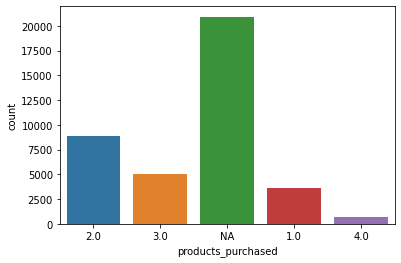

In [ ]:
# replacing missing with NA to create a new catergory
df['products_purchased'].fillna('NA', inplace=True)
sns.countplot(x='products_purchased', data=df);

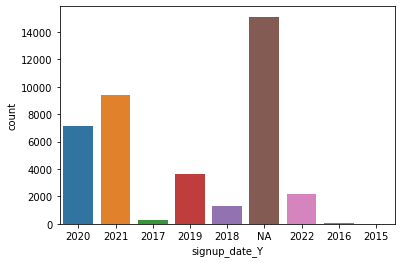

In [ ]:
df['signup_date_Y'].fillna('NA', inplace=True)
sns.countplot(x='signup_date_Y', data=df);

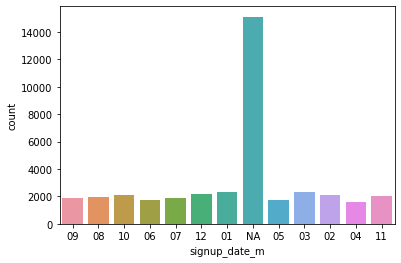

In [ ]:
df['signup_date_m'].fillna('NA', inplace=True)
sns.countplot(x='signup_date_m', data=df);

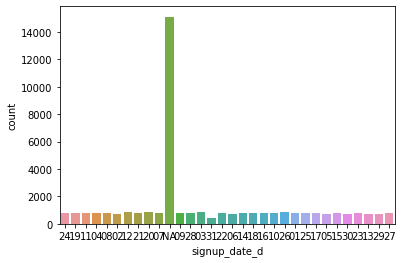

In [ ]:
df['signup_date_d'].fillna('NA', inplace=True)
sns.countplot(x='signup_date_d', data=df);

## Splitting the dataset into the Training set and Test set

In [ ]:
#Assigning X and y variables
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [ ]:
#Splitting data in train and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

## XGBOOST MODEL 

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
from sklearn.model_selection import cross_validate

In [ ]:
# Using XGBClassfier with hyperparameters evaluated from gridsearchCV mentioned below
classifier = XGBClassifier( colsample_bytree= 1,
                            gamma= 0.03,
                            learning_rate= 0.1,
                            max_depth= 3,
                            min_child_weight= 1,
                            n_estimators= 450,
                            subsample= 0.6)

classifier.fit(X_train, y_train)

XGBClassifier(gamma=0.03, n_estimators=450, subsample=0.6)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Evaluating the F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.724220623501199

## Hyperparamter tuning

###Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,8,10],
        'learning_rate': [0.001,0.01,0.1,1],
        'min_child_weight': [1,2,5,10],
        'gamma':[0.001,0.01,0.1],
        'n_estimators':[50,100,150,200],       
        }

In [ ]:
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


In [ ]:
xg_best = grid_search.best_estimator_
print(xg_best)

In [ ]:
y_pred_best = xg_best.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

## Submission Test file data prediction

In [ ]:
#Reading test file data
df_test = pd.read_csv('/content/drive/MyDrive/jobathon_june2022/test_Wf7sxXF.csv')
df_test[['created_at_Y', 'created_at_m', 'created_at_d']] = df_test['created_at'].str.split('-', expand = True)
temp1 = df_test.pop('created_at_d')
temp2 = df_test.pop('created_at_m')
temp3 = df_test.pop('created_at_Y')
df_test.insert(1,'created_at_d',temp1)
df_test.insert(2,'created_at_m',temp2)
df_test.insert(3,'created_at_Y',temp3)
df_test.pop('created_at')

df_test[['signup_date_Y', 'signup_date_m', 'signup_date_d']] = df_test['signup_date'].str.split('-', expand = True)
temp1 = df_test.pop('signup_date_d')
temp2 = df_test.pop('signup_date_m')
temp3 = df_test.pop('signup_date_Y')
df_test.insert(7,'signup_date_d',temp1)
df_test.insert(8,'signup_date_m',temp2)
df_test.insert(9,'signup_date_Y',temp3)
df_test.pop('signup_date')

0        2021-08-17
1        2020-05-21
2               NaN
3        2020-06-22
4        2021-03-10
            ...    
13179           NaN
13180    2022-03-19
13181    2021-08-15
13182           NaN
13183           NaN
Name: signup_date, Length: 13184, dtype: object

In [ ]:
df_test

,id,created_at_d,created_at_m,created_at_Y,campaign_var_1,campaign_var_2,products_purchased,signup_date_d,signup_date_m,signup_date_Y,...,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,01,01,2022,2,2,NaN,17,08,2021,...,0,0,0,1,0,0,0,0,1,0
1,39163,01,01,2022,4,7,3.0,21,05,2020,...,0,0,0,0,0,1,0,0,0,0
2,39164,01,01,2022,8,7,NaN,NaN,NaN,NaN,...,0,0,1,1,0,0,0,0,0,0
3,39165,01,01,2022,9,8,2.0,22,06,2020,...,0,0,1,1,1,0,0,0,2,0
4,39166,01,01,2022,4,5,2.0,10,03,2021,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,30,03,2022,16,12,NaN,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,0
13180,52342,30,03,2022,12,8,NaN,19,03,2022,...,0,0,0,1,0,0,0,0,0,0
13181,52343,30,03,2022,14,14,3.0,15,08,2021,...,1,0,0,0,1,0,0,0,0,0
13182,52344,30,03,2022,14,10,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
id_test_final = df_test.iloc[:,0].values
X_test_final = df_test.iloc[:,1:].values

### Predicting the Test set results using above trained XG Boost Model

In [ ]:
y_pred_final = classifier.predict(X_test_final)

In [ ]:
print(y_pred_final)

[1 0 0 ... 0 0 0]


In [ ]:
#Outputting submission results
df_my_submission = pd.DataFrame()
df_my_submission['id'] = id_test_final
df_my_submission['buy'] = y_pred_final
df_my_submission.to_csv('my_submission.csv',index=False)